In [22]:
from google.colab import files
uploaded = files.upload()


Saving biased_gender_loans (1).csv to biased_gender_loans (1) (1).csv


   salary  years_exp    sex bank_loan
0    1107         19  Woman        No
1    1267         10  Woman        No
2     896         19  Woman        No
3    1226         16  Woman        No
4    1207         19  Woman        No
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   salary     10000 non-null  int64 
 1   years_exp  10000 non-null  int64 
 2   sex        10000 non-null  object
 3   bank_loan  10000 non-null  object
dtypes: int64(2), object(2)
memory usage: 312.6+ KB
None
salary       0
years_exp    0
sex          0
bank_loan    0
dtype: int64


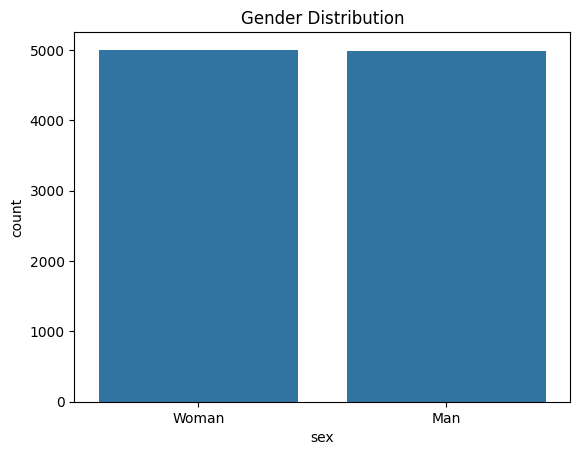

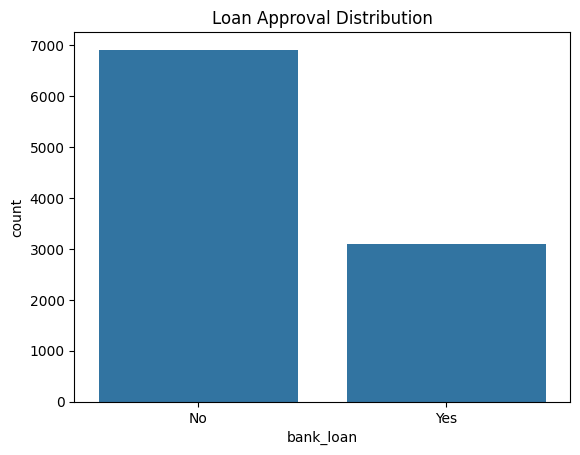

Selection Rate:
 sex
Man      0.429315
Woman    0.189173
Name: loan_num, dtype: float64


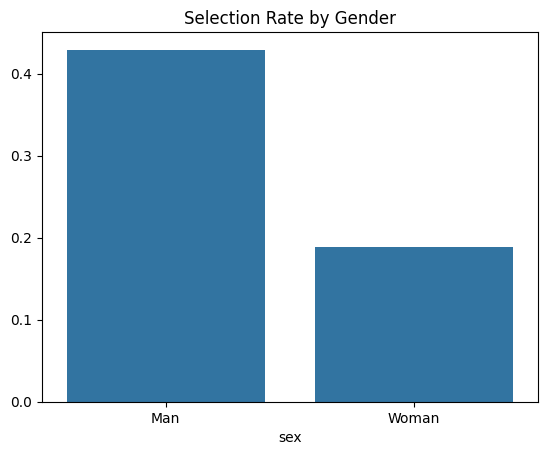

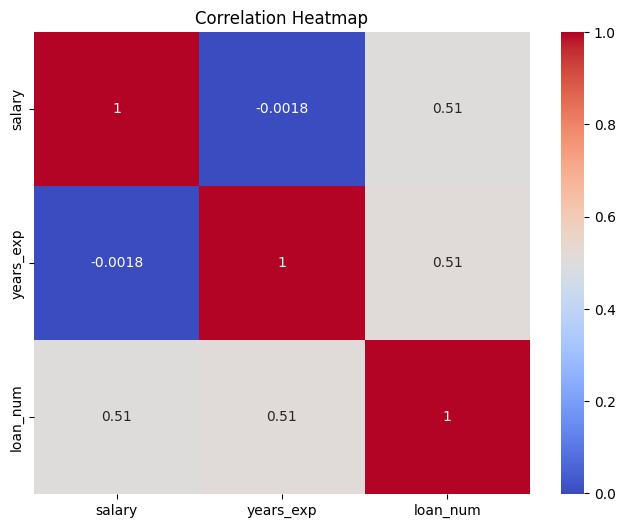

In [26]:
# Practical 1 - EDA for Demographic Imbalance

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("biased_gender_loans (1).csv")

# Basic Info
print(df.head())
print(df.info())
print(df.isnull().sum())

# Gender Distribution
sns.countplot(data=df, x='sex')
plt.title("Gender Distribution")
plt.show()

# Outcome Distribution
sns.countplot(data=df, x='bank_loan')
plt.title("Loan Approval Distribution")
plt.show()

# Encode Target
df['loan_num'] = df['bank_loan'].map({'Yes': 1, 'No': 0})

# Selection Rates
selection_rate = df.groupby('sex')['loan_num'].mean()
print("Selection Rate:\n", selection_rate)

# Bar plot
sns.barplot(x=selection_rate.index, y=selection_rate.values)
plt.title("Selection Rate by Gender")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
